In [1]:
from analyse_logs import *

df = logs_into_df(log_path)
df

Reading node-9.log
Reading node-1.log
Reading node-7.log
Reading node-3.log
Reading node-6.log
Reading node-4.log
Reading node-8.log
Reading node-10.log
Reading node-5.log
Reading node-2.log


,node_id,peer_id,in_out,timestamp,msg_type,key
0,9,1,out,2022-10-07 14:45:10.749298+01:00,FINDNODE/v5,NaN
1,9,1,in,2022-10-07 14:45:10.749319+01:00,WHOAREYOU/v5,NaN
2,9,1,out,2022-10-07 14:45:10.750188+01:00,FINDNODE/v5,NaN
3,9,1,in,2022-10-07 14:45:10.750250+01:00,NODES/v5,NaN
4,9,1,in,2022-10-07 14:45:10.750286+01:00,NODES/v5,NaN
...,...,...,...,...,...,...
13526,2,10,out,2022-10-07 14:45:53.467611+01:00,NODES/v5,NaN
13527,2,10,out,2022-10-07 14:45:53.467650+01:00,NODES/v5,NaN
13528,2,6,in,2022-10-07 14:45:53.501821+01:00,FINDNODE/v5,NaN
13529,2,6,out,2022-10-07 14:45:53.501883+01:00,NODES/v5,NaN


Text(0, 0.5, '#Messages')

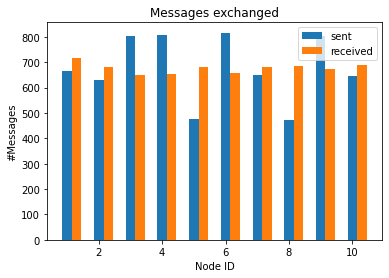

In [2]:
import matplotlib.pyplot as plt

sent = df[df['in_out'] == 'out']['node_id'].value_counts().to_dict()
sent = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
received = df[df['in_out'] == 'in']['node_id'].value_counts().to_dict()
received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(sent.keys(), sent.values(), width=width, label = 'sent')
plt.bar([x + width for x in received.keys()], received.values(), width=width, label = 'received')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Node ID')
plt.ylabel('#Messages')

<AxesSubplot:>

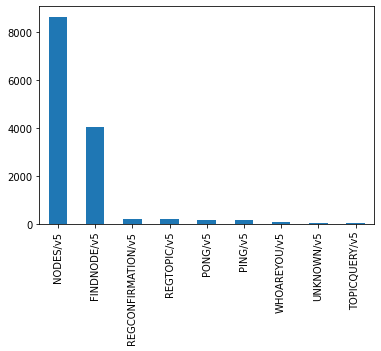

In [3]:
df['msg_type'].value_counts().plot(kind='bar')

In [1]:
import numpy as np
import math
import hashlib

df2 = df.dropna()
regs = df2[df2['msg_type'] == 'REGTOPIC/v5']['key'].value_counts().to_dict()
#regs = {int(k):int(v) for k,v in sent.items()} #convert IDs to int
queries = df2[df2['msg_type'] == 'TOPICQUERY/v5']['key'].value_counts().to_dict()
#received = {int(k):int(v) for k,v in received.items()} #convert IDs to int

width =0.3
plt.bar(regs.keys(), regs.values(), width=width, label = 'Registrations')
plt.bar([x + width for x in queries.keys()], queries.values(), width=width, label = 'Queries')
plt.legend()
plt.title('Messages exchanged')
plt.xlabel('Topic')
plt.ylabel('#Messages')



NameError: name 'df' is not defined